In [1]:
import sys
sys.path.append('/home/ak/Documents/Research/hsmm')


In [56]:
import pickle

from hsmm_core.data_utils import TradingHours, DataLoader
from hsmm_core.data_utils import get_files_for_ticker
from hsmm_core.labelling import DataLabellingSimple, DataLabellingCC
from hsmm_core.consts import ThresholdMethod, LabellingChoice
import datetime as dt
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline\

import numpy as np
plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle3.mplstyle'))
# for debugging
import pdb
from IPython.core.debugger import set_trace
from collections import defaultdict

In [68]:
mpl.get_configdir()
figures_destination = '/home/ak/Documents/Research/Papers/figures'

In [101]:
##helper functions for plotting##
def plot_set(df):
    for i in [1,5,10,100]:
        x= np.asarray(df.iloc[:,10*i].expanding().mean())
        plt.plot(x,linestyle='--', label =str(10*i)+'-slices')

def plot_single_sequence(df, seq_no):
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(10).mean()
    error=y.expanding(seq_no).std()
    plt.plot(x, y, 'k-',linewidth=0.9)
    plt.fill_between(x, y-error, y+error, alpha=0.8, edgecolor='#1B2ACD', facecolor='#fff4f2',
                         linewidth=0.4, linestyle='dashdot', antialiased=False)
    
    plt.legend([str(seq_no)+'-th time slice'])

def plot_single_sequence_error(df, seq_no):
    x= np.asarray(df.iloc[:,seq_no].index)
    y=df.iloc[:,seq_no].expanding(10).mean()
    error=y.expanding(seq_no).std()
    plt.plot(x, error, linestyle='dashdot',linewidth=0.9, color='r')
    plt.legend([str(seq_no)+'-th time slice '])

In [9]:

def open_pickle_filepath(pickle_file):
    pickle_to_file = pickle.load(open(pickle_file, "rb"), encoding='latin1')
    return pickle_to_file

In [3]:
sys.path.append('/home/ak/Documents/Research/master/hsmm_core/')
sys.path.append('/home/ak/Documents/Research/master/')
from hsmm_core.hmm import * 

 
import hsmm_core.observation_models 
from test_hmm.test_utils import generate_sample_paths_independent_sets
from hsmm_core.observation_models import ExpIndMixDiracGauss
%matplotlib inline

In [4]:
hsmm_core.hmm.hmm_impl?

In [148]:
laCie ='/media/ak/LaCie'
npy_files = [f for f in os.listdir(laCie) if str('.pkl') in f]
npy_files

['fischer_polar.pkl',
 'im_metrics.pkl',
 'ksi_metrics.pkl',
 'fischer_polar_2_.pkl',
 'im_metrics_2_.pkl',
 'ksi_metrics_2_.pkl',
 'fischer_polar_3_.pkl',
 'im_metrics_3_.pkl',
 'ksi_metrics_3_.pkl']

In [146]:
fileIdx = 1
file_path = os.path.join(laCie, npy_files[fileIdx])


In [15]:
im_metrics_lists = open_pickle_filepath(file_path)

In [142]:
im_metrics_dict = im_metrics_lists.item()
keys = list(im_metrics_dict.keys())
keys[2]

'trace'

In [143]:
# information matrix
df =pd.DataFrame(im_metrics_dict[keys[0]])
determ_df = pd.DataFrame(im_metrics_dict[keys[1]])
trace_df = pd.DataFrame(im_metrics_dict[keys[2]])


In [51]:
df = df.drop(columns=0)

(0.5, 12000.0)

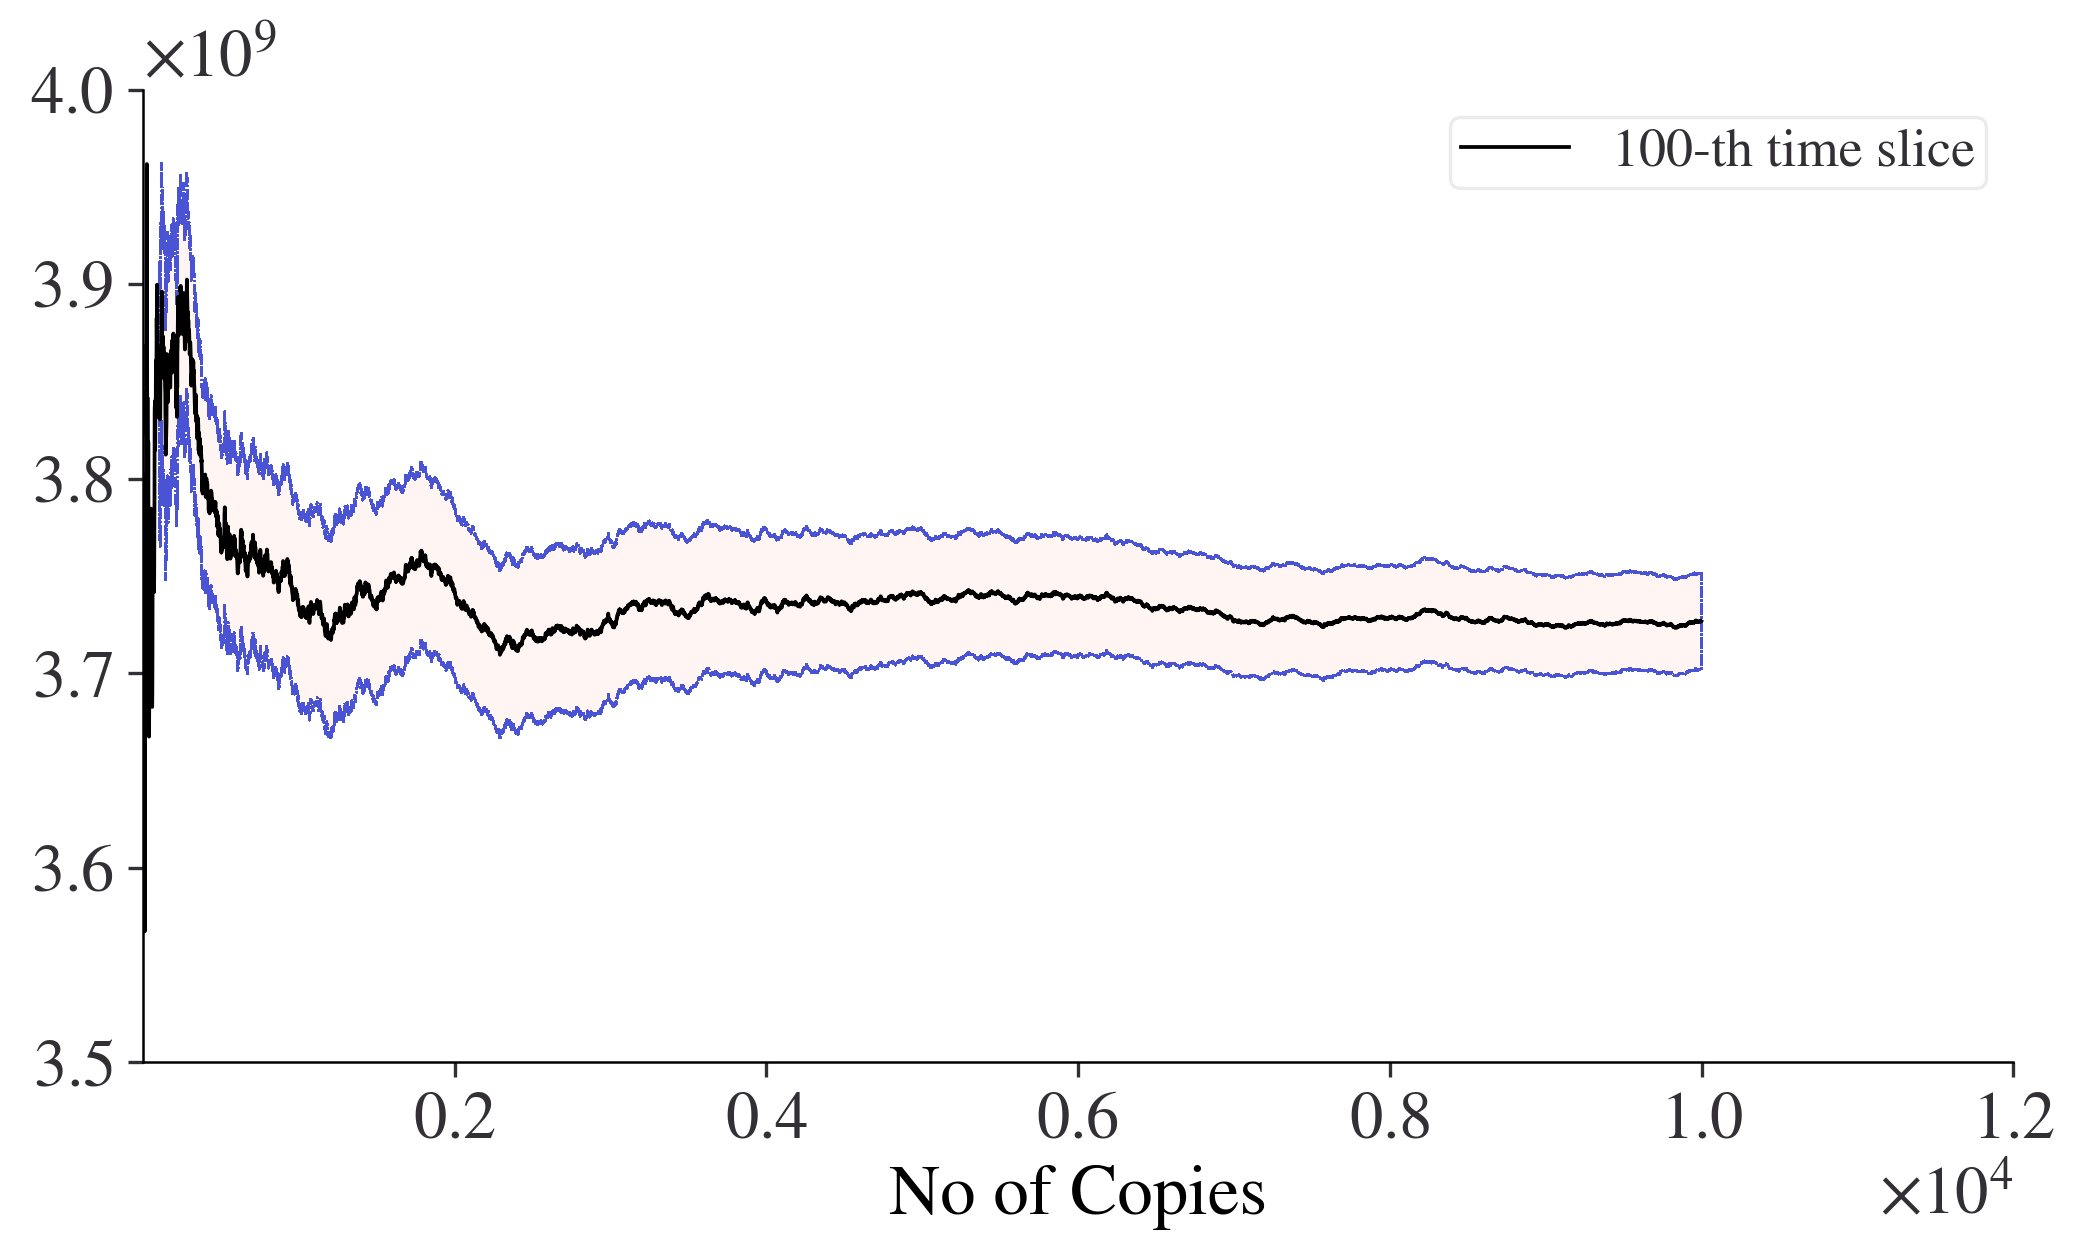

In [74]:

plot_single_sequence(df, 100)
plt.xlabel('No of Copies')


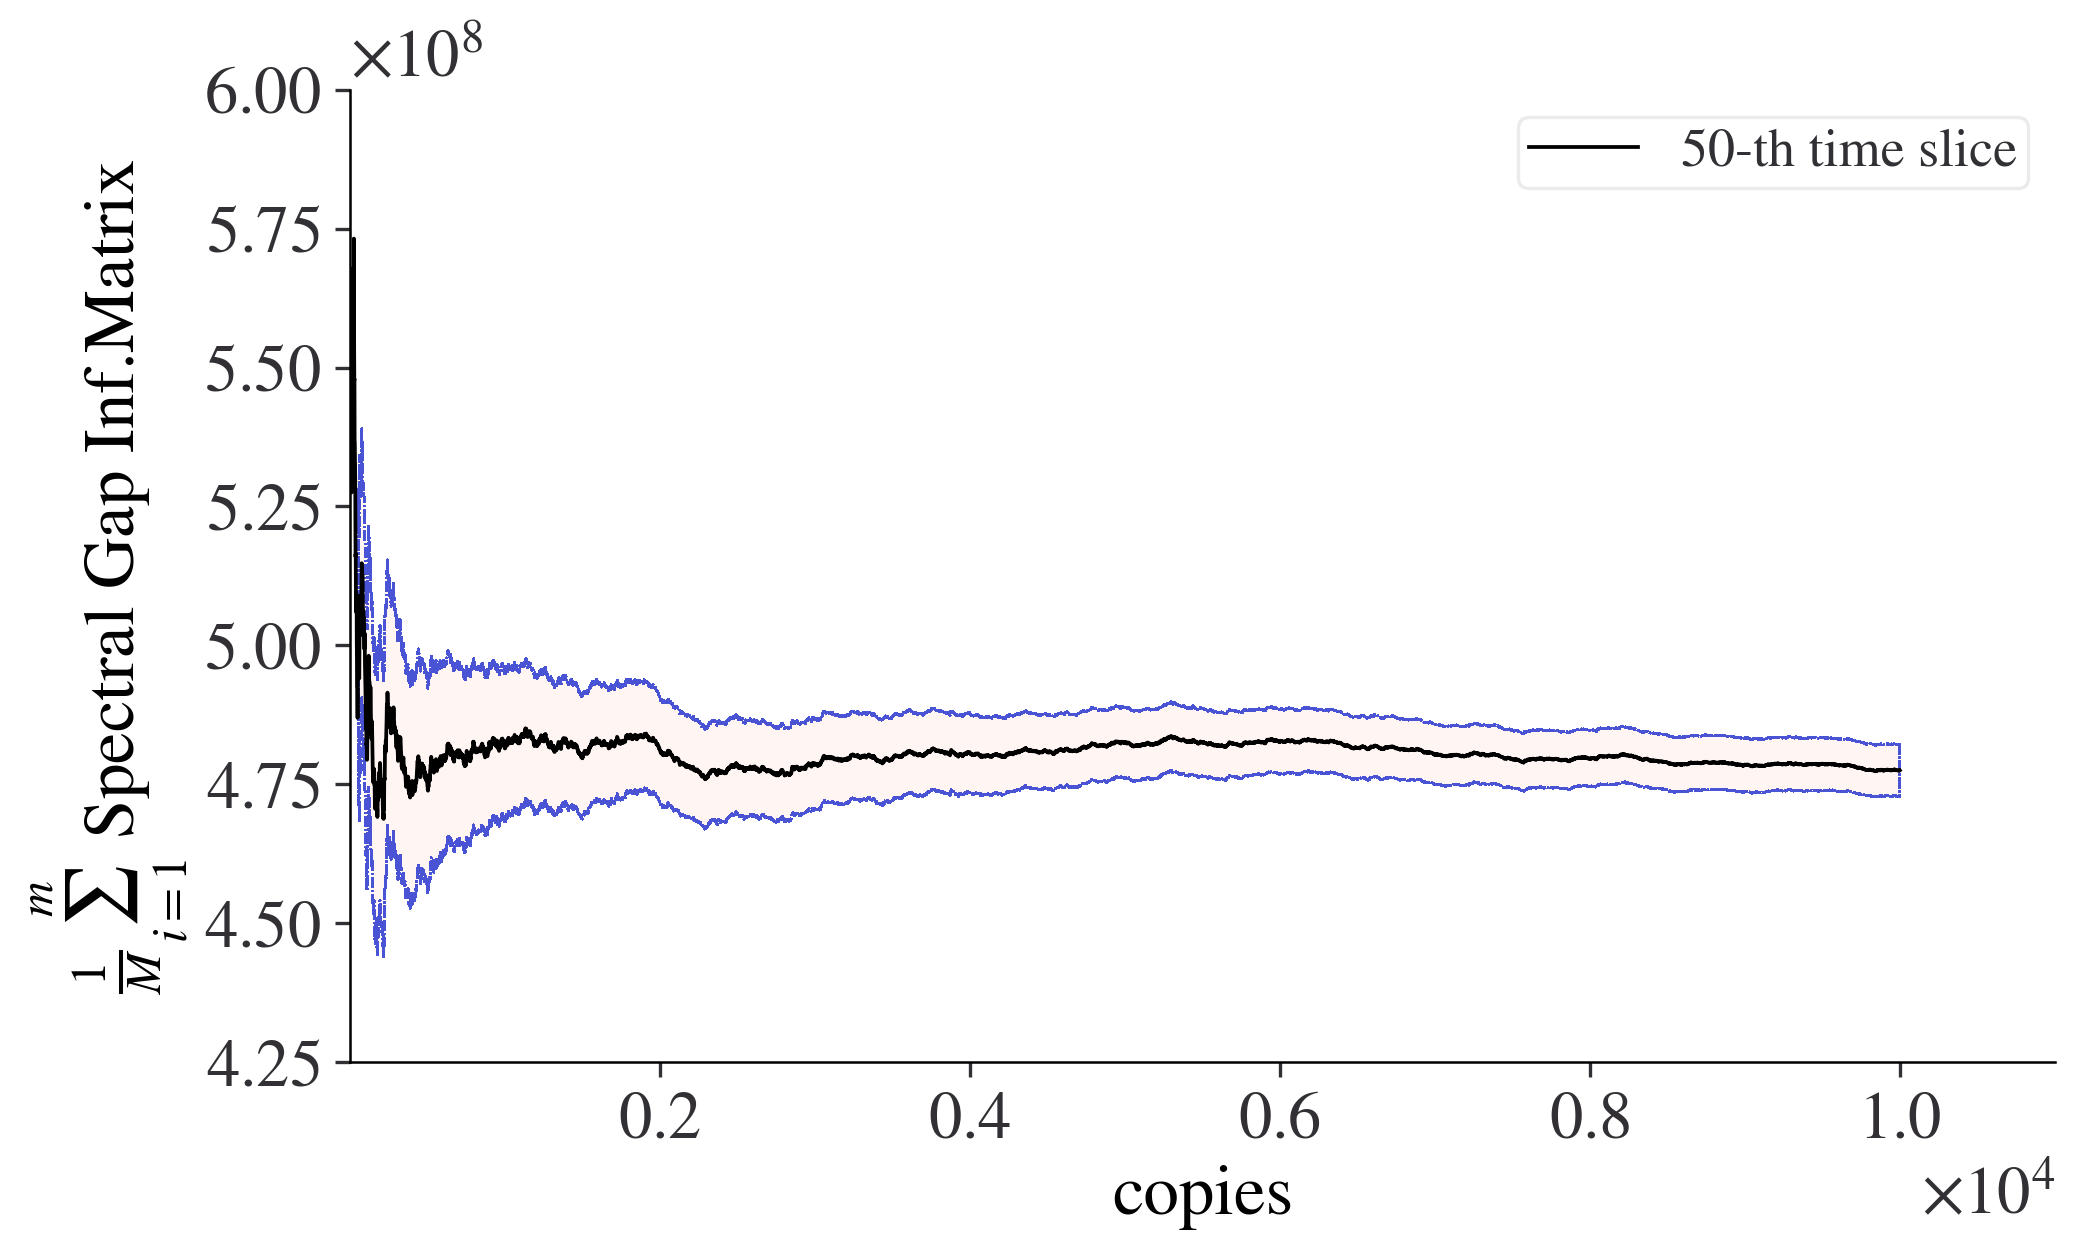

In [135]:
plt.figure() 
df =pd.DataFrame(im_metrics_dict[keys[1]])
seq_no =50
plot_single_sequence(df, seq_no)
plt.xlim(left = 0.00003*10000)
plt.xlim(right = 1.1*10000)


_= plt.ylabel(r'$\frac{1}{M}\sum_{i=1}^{m}$ Spectral Gap Inf.Matrix')
_= plt.xlabel('copies')
#plt.title('Information Matrix Spectral Gap ')
plot_title = 'seq_no_'+str(seq_no)+'_information_matrix_spectral_gap.png'
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1200)


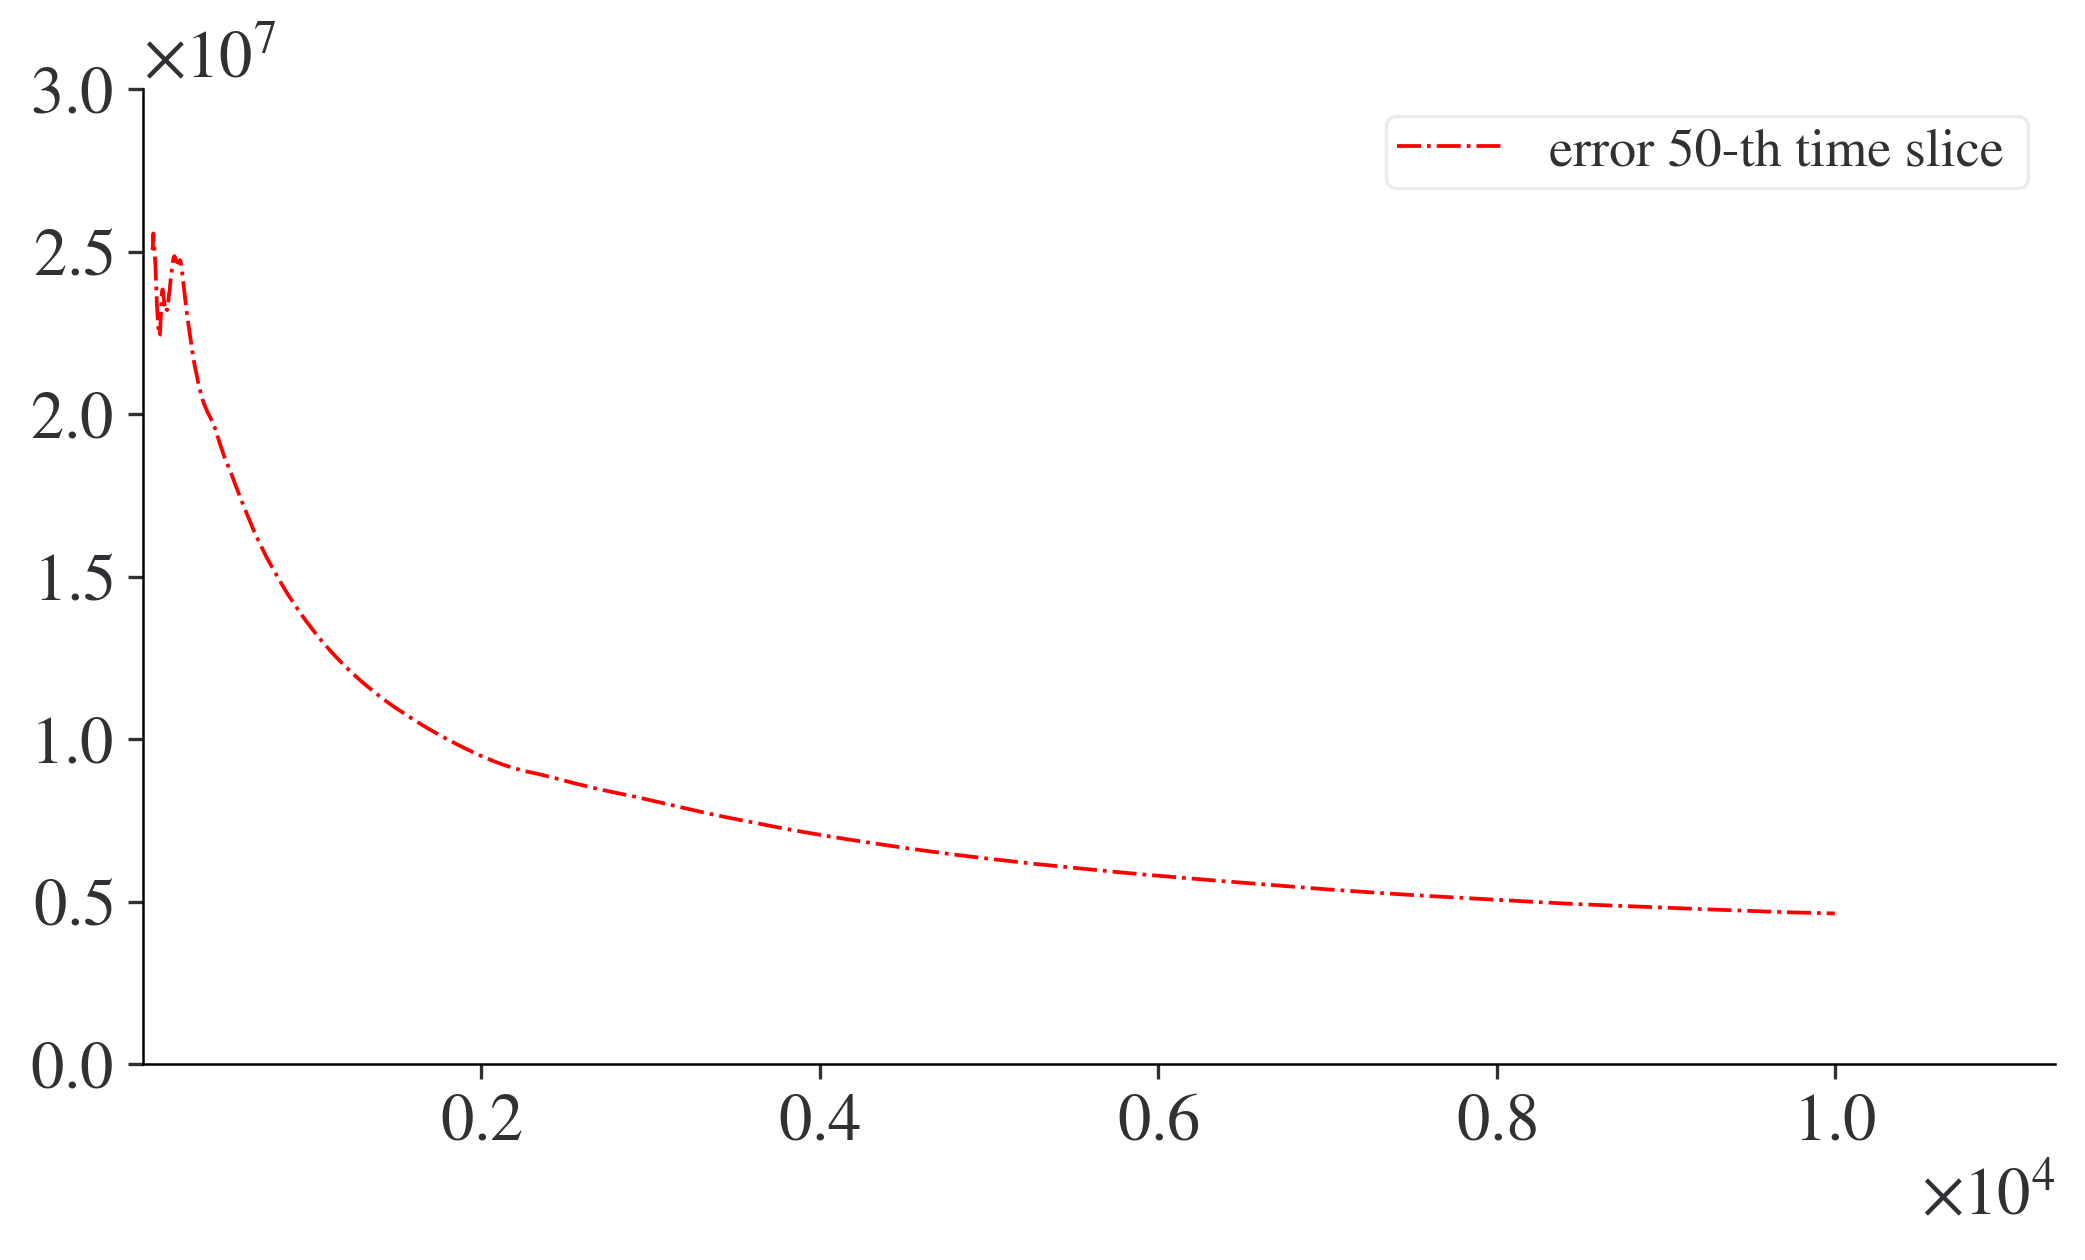

In [140]:
seq_no =50
x= np.asarray(df.iloc[:,seq_no].index)
y=df.iloc[:,seq_no].expanding(10).mean()
error=y.expanding(seq_no).std()
plt.xlim(left = 0.00003*10000)
plt.xlim(right = 1.13*10000)
#plt.title('Information Matrix Spectral Gap ')
plot_title = 'seq_no_'+str(seq_no)+'_error_information_matrix_spectral_gap.png'
plot_loc = os.path.join( figures_destination, plot_title)
plt.savefig(plot_loc, dpi=1200)
plt.plot(x, error, linestyle='dashdot',linewidth=0.9, color='r')
plt.legend(['error '+str(seq_no)+'-th time slice '])